# example CMIP EC Calc

In [1]:
import sys
sys.path.append(sys.path[0]+'/../../')

#import my functions
import helpers.fileHandler as fh
import utils._modelDefinitions as _model
import utils.ecIndex as ec

# handy python functions
import xarray
import matplotlib.pyplot as plt
import cartopy.crs as ccrs


# turn off warnings:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#pick a model
iModel=_model.scenarioMip[5]

In [3]:
# For all the models, calculate the alphas and e/c Index

print(iModel[1])

climatXr=fh.loadModelData(iModel[1], 'tos_Omon', 'piControl', iModel[2]).tos

CAS-ESM2-0


In [4]:
tsXr = xarray.concat([
    fh.loadModelData(iModel[1], 'tos_Omon', 'historical', iModel[3]).tos, 
    fh.loadModelData(iModel[1], 'tos_Omon', 'ssp585', iModel[3]).tos
], dim='time')

Not found on Gadi
Making request file
b''


In [5]:
tsXr

<xarray.DataArray 'tos' (time: 3012, lat: 196, lon: 360)>
dask.array<concatenate, shape=(3012, 196, 360), dtype=float32, chunksize=(1980, 196, 360), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1850-01-16 00:00:00 ... 2100-12-16 00:00:00
  * lat      (lat) float64 -78.0 -77.0 -76.0 -75.0 -74.0 ... 87.0 88.0 89.0 90.0
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Attributes:
    standard_name:  sea_surface_temperature
    long_name:      Sea Surface Temperature
    comment:        Temperature of upper boundary of the liquid ocean, includ...
    units:          degC
    cell_methods:   area: mean where sea time: mean
    cell_measures:  area: areacello
    history:        2020-03-06T11:58:41Z altered by CMOR: replaced missing va...

In [6]:
sstAnomXr=ec.sstAnoms(tsXr, climatXr)

In [7]:
sstAnomXr.values

array([[[-3.87734398e-01, -4.11635884e-01,             nan, ...,
         -1.39309906e-01,  1.55649339e-02,  1.45611572e-01],
        [-3.63647633e-01, -4.30350004e-01,             nan, ...,
          3.48665681e-03,  1.99604590e-01,  1.57096845e-01],
        [-3.46627753e-01, -4.63179856e-01,             nan, ...,
          8.32240045e-02,  2.57703430e-01,  1.45459072e-01],
        ...,
        [-3.04061686e-02, -5.03553961e-02, -7.55409706e-02, ...,
         -1.25838091e-02,  2.30519703e-02, -7.94919506e-03],
        [ 4.47350881e-02,  3.30877888e-02,  2.57520954e-02, ...,
         -2.08696116e-02, -7.56413309e-02, -2.05606667e-01],
        [ 1.04204585e-01,  1.09767816e-01,  1.18672762e-01, ...,
         -1.99247503e-01, -1.82695841e-01, -4.04852916e-01]],

       [[-9.73268647e-02, -1.27656542e-01,             nan, ...,
          2.45932910e-01,  4.01124132e-01,  4.69046340e-01],
        [-2.67339595e-02, -1.21564669e-01,             nan, ...,
          2.89189350e-01,  5.63779678e

In [8]:
tsXr.sel(j=150,i=180).plot()
sstAnomXr.sel(j=150,i=180).plot()

ValueError: dimensions or multi-index levels ['j', 'i'] do not exist

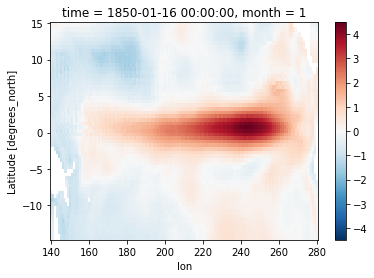

In [9]:
sstAnomXr.isel(time=0).plot()

In [10]:
indeces, pFit, eofsXr = ec.ecIndex(sstAnomXr)



In [11]:
indeces

<xarray.Dataset>
Dimensions:   (time: 3012)
Coordinates:
  * time      (time) object 1850-01-16 00:00:00 ... 2100-12-16 00:00:00
    month     (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    pc1       (time) float64 -0.8099 -0.5663 -0.00637 ... 0.424 0.3726 -0.4607
    pc2       (time) float64 -0.7098 -1.023 -0.8848 ... 0.2994 0.146 -0.1315
    alpha     float64 -0.1946
    alphaDjf  float64 0.4304

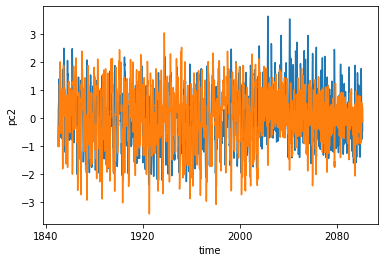

In [12]:
indeces.pc1.plot()
indeces.pc2.plot()

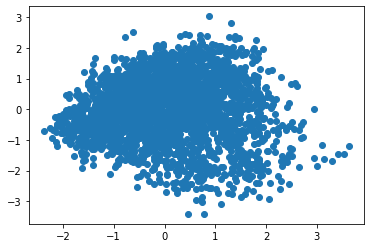

In [13]:
plt.scatter(indeces.pc1.values, indeces.pc2.values)

In [14]:
eofsXr

<xarray.DataArray 'eofs' (mode: 2, lat: 56, lon: 141)>
array([[[ 0.52311046,  0.56143718,         nan, ...,  0.7200954 ,
          0.74011949,  0.74794608],
        [ 0.55363819,  0.57478007,         nan, ...,  0.7462054 ,
          0.75694116,  0.75666975],
        [ 0.57740851,  0.5821954 ,         nan, ...,  0.75387244,
          0.76807419,  0.74968198],
        ...,
        [ 0.06065449,  0.07507668,  0.07401102, ...,  0.29318713,
          0.34045825,  0.37403018],
        [ 0.13830717,  0.13964228,  0.13638077, ...,  0.29144023,
          0.29376686,  0.37499978],
        [ 0.18989868,  0.18995636,  0.18580036, ...,  0.19813035,
          0.35831603,  0.40349283]],

       [[-0.30020758, -0.29187354,         nan, ...,  0.09317948,
          0.09300588,  0.04789832],
        [-0.28346411, -0.27268576,         nan, ...,  0.07307145,
          0.0732875 ,  0.0262041 ],
        [-0.26703264, -0.25854871,         nan, ...,  0.06298181,
          0.05728   , -0.00304709],
        ...,
        [-0.11362523, -0.12401816, -0.13950123, ...,  0.085912  ,
          0.11096177,  0.12277159],
        [-0.06562336, -0.07830946, -0.10259751, ...,  0.08632498,
          0.12267133,  0.12808464],
        [-0.0372632 , -0.0534168 , -0.07072514, ...,  0.08167419,
          0.10297758,  0.07686971]]])
Coordinates:
  * mode     (mode) int64 0 1
  * lat      (lat) float64 -14.32 -13.52 -12.77 -12.07 ... 13.43 14.07 14.77
  * lon      (lon) float64 140.0 141.0 142.0 143.0 ... 277.0 278.0 279.0 280.0
Attributes:
    long_name:  correlation_between_pcs_and_enso

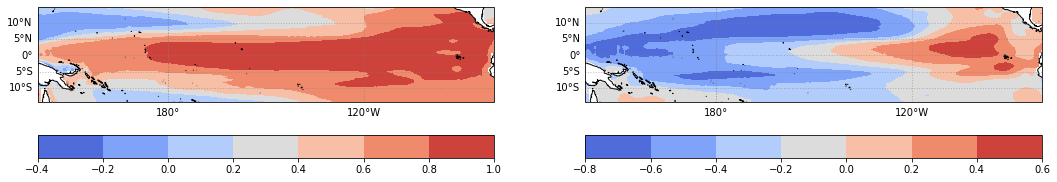

In [15]:
fig=plt.figure(figsize=(18,12))
for mode in [0,1]:
    ax=fig.add_subplot(1,2,mode+1,projection=ccrs.Miller(central_longitude=210))
    ec.ensoPlotter(eofsXr.sel(mode=mode),ax)